# Modelling evolution in fluctuating environments

In this notebook we will explain the method for modelling evolution when the population dynamics fluctuate developed by Ferris & Best (2018). In particular, this code contains the workings to produce the results for the two case studies given in the main manuscript.

## Case study 1: seasonal forcing in competition

We first look at the evolution of host avoidance to parasitism (reduced infection) when the degree of competition for resources oscillates seasonally.

The population dynamics of our system are given by a standard susceptible-infected-susceptiblke framework as follows,
\begin{align}
\frac{dS}{dt} &= (a-q(t)(S+I))S-bS-\beta SI + \gamma I\\
\frac{dI}{dt} &= \beta SI - (b+\alpha+\gamma) I.
\end{align}



In the first code cell below we run the resident dynamics of the system for some chosen parameter values, demonstrating the resulting yearly limit cycle.

(0.0, 30.0)

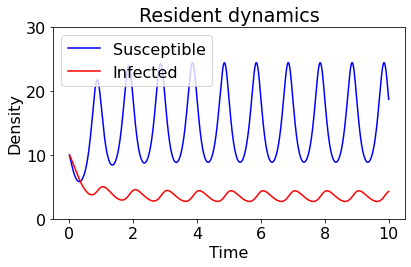

In [4]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
plt.rcParams.update({'font.size':16})

# Parameter values
alpha=1
b=1
gamma=1
q0=0.5
delta=0.5
beta=0.2
a=10

def popdyn(t,x):
    """Function to run population dynamics"""
    q=q0*(1+delta*np.sin(2*np.pi*t))
    sdot=(a-q*(x[0]+x[1]))*x[0]-b*x[0]-beta*x[0]*x[1]+gamma*x[1]
    idot=beta*x[0]*x[1]-(b+alpha+gamma)*x[1]
    return [sdot,idot]

# Run the model
ts=np.linspace(0,10,1001)
sol=solve_ivp(popdyn,[ts[0],ts[-1]],[10,10],t_eval=ts,method='Radau')

# Plotting commands
plt.plot(sol.t,sol.y[0],color='b',label='Susceptible')
plt.plot(sol.t,sol.y[1],color='r',label='Infected')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Density')
plt.title('Resident dynamics')
plt.tight_layout()
plt.ylim([0,30])
#plt.savefig('resident.png')

The next code cell focusses on the evolution of host avoidance. In particular it produces a pairwise invasion plot to show the evolutionary outcome when there is a trade-off between avoidance and reproduction in the host for a given parameter set.

Resident strain 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11 , 12 , 13 , 14 , 15 , 16 , 17 , 18 , 19 , 20 , 21 , 22 , 23 , 24 , 25 , 26 , 27 , 28 , 29 , 30 , 31 , 32 , 33 , 34 , 35 , 36 , 37 , 38 , 39 , 40 , 41 

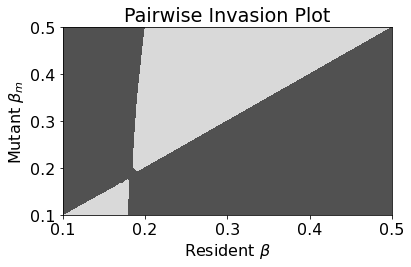

In [5]:
# Parameter values
alpha=1
b=1
gamma=1
q0=0.5
delta=0.5

# Additional variables/parameters needed
strains=41
IC=[20,5]
fit=[]

# Trade-off 
curve=3
I_c=15*(9-q0*15)/(15*(q0+0.2)-1)
grad=(2)/(3)*I_c

def resdyn(t,x):
    """Function to run population dynamics"""
    q=q0*(1+delta*np.sin(2*np.pi*t))
    sdot=(a-q*(x[0]+x[1]))*x[0]-b*x[0]-beta*x[0]*x[1]+gamma*x[1]
    idot=beta*x[0]*x[1]-(b+alpha+gamma)*x[1]
    return [sdot,idot]

def mutdyn(t,x):
    """Function to run resident-mutant dynamics"""
    q=q0*(1+delta*np.sin(2*np.pi*t))
    sdot=(a-q*(x[0]+x[1]))*x[0]-b*x[0]-beta*x[0]*x[1]+gamma*x[1]
    idot=beta*x[0]*x[1]-(b+alpha+gamma)*x[1]
    smdot=(am-q*(x[0]+x[1]))*x[2]-b*x[2]-betam*x[2]*x[1]+gamma*x[3]
    imdot=betam*x[2]*x[1]-(b+alpha+gamma)*x[3]
    return [sdot,idot,smdot,imdot]

# Loop through resident strains
for res in range(strains):
    if res==0:
        print("Resident strain 1", end=" ")
    else:
        print(", %i" %int(res+1), end=" ")
    beta=0.1+0.01*res
    a=10 -(grad)**2/(curve)*(1 - np.exp((beta - 0.2)*(curve)/grad))
    solr=solve_ivp(resdyn,[ts[0],ts[-1]],IC,t_eval=ts,method='Radau')
    
    ICm1=[solr.y[0,-1],solr.y[1,-1],1,0]
    ICm2=[solr.y[0,-1],solr.y[1,-1],0,1]
    
    # Loop through mutant strains
    for mut in range(strains):
        betam=0.1+0.01*mut
        am=10 -(grad)**2/(curve)*(1 - np.exp((betam - 0.2)*(curve)/grad))
        solm1=solve_ivp(mutdyn,[0,2],ICm1,method='Radau')
        solm2=solve_ivp(mutdyn,[0,2],ICm2,method='Radau')
        C=[[solm1.y[2,-1],solm1.y[3,-1]],[solm2.y[2,-1],solm2.y[3,-1]]]
        eigs=np.linalg.eig(C)
        fit.append(np.log(max(eigs[0])))

# Plotting commands
fita=np.array(fit).reshape(-1, strains)
bplot=np.linspace(0.1,0.5,41)
plt.contourf(bplot,bplot,np.transpose(fita),0,cmap='Greys')
plt.xlabel('Resident $\\beta$')
plt.ylabel('Mutant $\\beta_m$')
plt.title('Pairwise Invasion Plot')
plt.tight_layout()
#plt.savefig('pip2.png')

The next code cell builds on the previous cell to find a CSS point as a parameter is varied by considering the invasion fitness of a nearby mutant.

In [ ]:
# Parameter values
alpha=1
b=1
gamma=1
q0=0.5
delta=0.5

# Additional variables needed
strains=41
IC=[20,5]
fit=[]

def resdyn(t,x):
    """Function to run population dynamics"""
    q=q0*(1+delta*np.sin(2*np.pi*t))
    sdot=(a-q*(x[0]+x[1]))*x[0]-b*x[0]-beta*x[0]*x[1]+gamma*x[1]
    idot=beta*x[0]*x[1]-(b+alpha+gamma)*x[1]
    return [sdot,idot]

def mutdyn(t,x):
    """Function to run resident-mutant dynamics"""
    q=q0*(1+delta*np.sin(2*np.pi*t))
    sdot=(a-q*(x[0]+x[1]))*x[0]-b*x[0]-beta*x[0]*x[1]+gamma*x[1]
    idot=beta*x[0]*x[1]-(b+alpha+gamma)*x[1]
    smdot=(am-q*(x[0]+x[1]))*x[2]-b*x[2]-betam*x[2]*x[1]+gamma*x[3]
    imdot=betam*x[2]*x[1]-(b+alpha+gamma)*x[3]
    return [sdot,idot,smdot,imdot]

# Vary the baseline competition
solstore=[]
for q0 in [0.1,0.5]:
    # Trade-off
    curve=-3
    I_c=15*(9-q0*15)/(15*(q0+0.2)-1)
    grad=(2)/(3)*I_c
    
    for d in range(21):
        delta=d*0.05
        if d==0:
            print("Delta = 0", end=" ")
        else:
            print(", %.2f" %(delta), end=" ")
        
        for res in range(strains):
            beta=0.1+0.01*res
            a=10 -(grad)**2/(curve)*(1 - np.exp((beta - 0.2)*(curve)/grad))
            solr=solve_ivp(resdyn,[ts[0],ts[-1]],IC,t_eval=ts,method='Radau')

            ICm1=[solr.y[0,-1],solr.y[1,-1],1,0]
            ICm2=[solr.y[0,-1],solr.y[1,-1],0,1]

            betam=beta+0.01
            am=10 -(grad)**2/(curve)*(1 - np.exp((betam - 0.2)*(curve)/grad))
            solm1=solve_ivp(mutdyn,[0,2],ICm1,method='Radau')
            solm2=solve_ivp(mutdyn,[0,2],ICm2,method='Radau')
            C=[[solm1.y[2,-1],solm1.y[3,-1]],[solm2.y[2,-1],solm2.y[3,-1]]]
            eigs=np.linalg.eig(C)
            if(np.log(max(eigs[0])))<0:
                solstore.append(beta)
                break

#Plotting commands
delt=np.linspace(0,1,21)
plt.scatter(delt,solstore[0:21],color='b',label='$q=0.1$')
plt.scatter(delt,solstore[21:42],color='r',label='$q=0.5$')
plt.xlabel('Amplitude, $\\delta$')
plt.ylabel('CSS Transmission, $\\beta$')
plt.ylim([0.1, 0.5])
plt.tight_layout()
plt.legend()
#plt.savefig('varyalpha.png')

## Case study 2

Now we move on to a model with a free-living parasite stage, that also leads to limit cycles for some (but not all) parameter values. Noitice the dynamics have bene log-transformed to prevent the model failing to run due to stiffness.

In [1]:
# Import libraries
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
plt.rcParams.update({'font.size':16})

# Parameter values
alpha=1
b=1
gamma=0.1
q=0.1
mu=0.1
theta=5
beta=0.1
a=10

def logdyn(t,x):
    """Function to run population dynamics"""
    sdot=a-q*(np.exp(x[0])+np.exp(x[1]))-b-beta*np.exp(x[2])+gamma*np.exp(x[1]-x[0])
    idot=beta*np.exp(x[0]+x[2]-x[1])-(b+alpha+gamma)
    pdot=theta*np.exp(x[1]-x[2])-mu
    return [sdot,idot,pdot]

# Plot commands
ts=np.linspace(0,500,50001)
sol=solve_ivp(logdyn,[ts[0],ts[-1]],[-15,-10,5],t_eval=ts,method='Radau')
plt.plot(sol.t,np.exp(sol.y[1]),color='r',label='Infected')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Density')
plt.title('Resident dynamics')

# Add crosses for peaks
peakcheck=np.exp(sol.y[1])
peaks,_=find_peaks(peakcheck,height=1)
plt.plot(ts[peaks], (peakcheck[peaks]), "x")

plt.tight_layout()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in exp
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp


Now we allow the host to evolve avoidance but with a trade-off with reproduction. Again we demonstrate the results trhough a pairwise invasion plot. *Note: this system is slower to run than the previous one: have patience!*

In [ ]:
# Parameter values
alpha=1
b=1
gamma=0.1
q=0.1
mu=0.1
theta=5

strains=41
IC=[-5,-3.5,2]
fit=[]
ts=np.linspace(0,5000,50000)

# Trade-off
curve=-400
grad=75

def resdyn(t,x):
    """Function to run population dynamics"""
    sdot=a-q*(np.exp(x[0])+np.exp(x[1]))-b-beta*np.exp(x[2])+gamma*np.exp(x[1]-x[0])
    idot=beta*np.exp(x[0]+x[2]-x[1])-(b+alpha+gamma)
    pdot=theta*np.exp(x[1]-x[2])-mu
    return [sdot,idot,pdot]

def mutdyn(t,x):
    """Function to run mutant-residentpopulation dynamics"""
    sdot=a-q*(np.exp(x[0])+np.exp(x[1]))-b-beta*np.exp(x[2])+gamma*np.exp(x[1]-x[0])
    idot=beta*np.exp(x[0]+x[2]-x[1])-(b+alpha+gamma)
    pdot=theta*np.exp(x[1]-x[2])-mu
    
    smdot=am-q*(np.exp(x[0])+np.exp(x[1]))-b-betam*np.exp(x[2])+gamma*np.exp(x[4]-x[3])
    imdot=betam*np.exp(x[3]+x[2]-x[4])-(b+alpha+gamma)
    return [sdot,idot,pdot,smdot,imdot]

# Loop through resident strains
for res in range(strains):
    beta=0.05+0.0025*res
    a=10 -(grad)**2/(curve)*(1 - np.exp((beta - 0.1)*(curve)/grad))
    solr=solve_ivp(resdyn,[ts[0],ts[-1]],IC,t_eval=ts,method='Radau')
    if res==0:
        print("Resident strain 1", end=" ")
    else:
        print(", %i" %int(res+1), end=" ")
    
    # Use peaks to find period
    peakcheck=np.exp(solr.y[1])
    peaks,_=find_peaks(peakcheck,height=0.2)
    if len(peaks)<1 or ts[peaks[-1]]-ts[peaks[-2]]<1:
        period=1
    else:
        period=ts[peaks[-1]]-ts[peaks[-2]]
        
    ICm1=[solr.y[0,peaks[-2]],solr.y[1,peaks[-2]],solr.y[2,peaks[-2]],0,-100]
    ICm2=[solr.y[0,peaks[-2]],solr.y[1,peaks[-2]],solr.y[2,peaks[-2]],-100,0]
    
    # Loop through mutant strains
    for mut in range(strains):
        betam=0.05+0.0025*mut
        am=10 -(grad)**2/(curve)*(1 - np.exp((betam - 0.1)*(curve)/grad))
        solm1=solve_ivp(mutdyn,[0,period*2],ICm1,method='Radau')
        solm2=solve_ivp(mutdyn,[0,period*2],ICm2,method='Radau')
        C=[[np.exp(solm1.y[3,-1]),np.exp(solm1.y[4,-1])],[np.exp(solm2.y[3,-1]),np.exp(solm2.y[4,-1])]]
        eigs=np.linalg.eig(C)
        fit.append(np.log(max(eigs[0])))

# Plotting commands
fita=np.array(fit).reshape(-1, strains)
from numpy import inf
fita[fita == -inf] = -100
bplot=np.linspace(0.05,0.15,41)
plt.contourf(bplot,bplot,np.transpose(fita),0,cmap='Greys')
plt.xlabel('Resident $\\beta$')
plt.ylabel('Mutant $\\beta_m$')
plt.title('Pairwise Invasion Plot')
#plt.savefig('pipsip.png')

Again, our next stage is to vary a parameter value and then identify the CSS.

In [ ]:
# Parameter values
alpha=1
b=1
gamma=0.1
q=0.1
mu=0.1
theta=4

strains=41
IC=[-5,-3.5,2]
fit=[]
ts=np.linspace(0,1000,50000)

# Trade-off
curve=-400
grad=75

def resdyn(t,x):
    """Function to run population dynamics"""
    sdot=a-q*(np.exp(x[0])+np.exp(x[1]))-b-beta*np.exp(x[2])+gamma*np.exp(x[1]-x[0])
    idot=beta*np.exp(x[0]+x[2]-x[1])-(b+alpha+gamma)
    pdot=theta*np.exp(x[1]-x[2])-mu
    return [sdot,idot,pdot]

def mutdyn(t,x):
    """Function to run mutant-residentpopulation dynamics"""
    sdot=a-q*(np.exp(x[0])+np.exp(x[1]))-b-beta*np.exp(x[2])+gamma*np.exp(x[1]-x[0])
    idot=beta*np.exp(x[0]+x[2]-x[1])-(b+alpha+gamma)
    pdot=theta*np.exp(x[1]-x[2])-mu
    
    smdot=am-q*(np.exp(x[0])+np.exp(x[1]))-b-betam*np.exp(x[2])+gamma*np.exp(x[4]-x[3])
    imdot=betam*np.exp(x[3]+x[2]-x[4])-(b+alpha+gamma)
    return [sdot,idot,pdot,smdot,imdot]

cssstore=[]
for d in range(21):
    theta=4.0+d*0.2
    if d==0:
        print("Theta = 4.0", end=" ")
    else:
        print(", %.1f" %(theta), end=" ")
    for res in range(strains):
        beta=0.05+0.0025*res
        a=10 -(grad)**2/(curve)*(1 - np.exp((beta - 0.1)*(curve)/grad))
        solr=solve_ivp(resdyn,[ts[0],ts[-1]],IC,t_eval=ts,method='Radau')
        peaks,_=find_peaks(np.exp(solr.y[1]),height=0.2)
        if len(peaks)<1 or ts[peaks[-1]]-ts[peaks[-2]]<1:
            period=1
        else:
            period=ts[peaks[-1]]-ts[peaks[-2]]
       
        ICm1=[solr.y[0,-1],solr.y[1,-1],solr.y[2,-1],0,-100]
        ICm2=[solr.y[0,-1],solr.y[1,-1],solr.y[2,-1],-100,0]

        betam=beta+0.005
        am=10 -(grad)**2/(curve)*(1 - np.exp((betam - 0.1)*(curve)/grad))
        solm1=solve_ivp(mutdyn,[0,period*2],ICm1,method='Radau')
        solm2=solve_ivp(mutdyn,[0,period*2],ICm2,method='Radau')
        C=[[np.exp(solm1.y[3,-1]),np.exp(solm1.y[4,-1])],[np.exp(solm2.y[3,-1]),np.exp(solm2.y[4,-1])]]
        eigs=np.linalg.eig(C)
        if(np.log(max(eigs[0])))<0:
            cssstore.append(beta)
            break
            
# Plotting commands
alpha=np.linspace(3,5,21)
plt.scatter(alpha,cssstore[0:21],color='b')
plt.xlabel('Virulence, $\\alpha$')
plt.ylabel('CSS Transmission, $\\beta$')
plt.ylim([0.05, 0.15])
plt.tight_layout()
#plt.savefig('varyalpha.png')

For this model we also want to know the period of the cycles. We calculate this below. We note that sometimes an equilibrium can show up as being a very slow cycle. Some trial and error is needed to spot these values and account for them.

In [ ]:
# Parameter values
alpha=1
b=1
gamma=0.1
q=0.1
mu=0.1
theta=5

strains=41
IC=[-5,-3.5,2]
ts=np.linspace(0,1000,50000)

# Trade-off
curve=-400
grad=75

def resdyn(t,x):
    """Function to run population dynamics"""
    sdot=a-q*(np.exp(x[0])+np.exp(x[1]))-b-beta*np.exp(x[2])+gamma*np.exp(x[1]-x[0])
    idot=beta*np.exp(x[0]+x[2]-x[1])-(b+alpha+gamma)
    pdot=theta*np.exp(x[1]-x[2])-mu
    return [sdot,idot,pdot]

solstore=[]

for d in range(21):
    theta=4.0+d*0.2
    if d==0:
        print("Theta = 4.0", end=" ")
    else:
        print(", %.1f" %(theta), end=" ")
    for res in range(strains):
        beta=0.05+0.0025*res
        a=10 -(grad)**2/(curve)*(1 - np.exp((beta - 0.1)*(curve)/grad))
        sols=solve_ivp(resdyn,[ts[0],ts[-1]],IC,t_eval=ts,method='Radau')
        peaks,_=find_peaks(np.exp(sols.y[1]),height=0.2)
        if len(peaks)<1 or ts[peaks[-1]]-ts[peaks[-2]]<1:
            period=1
        else:
            period=ts[peaks[-1]]-ts[peaks[-2]]
        solstore.append(period)
        
for i in range(861):
    if solstore[i]>20:
        solstore[i]=1

plt.contour(np.array(solstore).reshape(21,41).transpose())

Finally we put the last two results together, plotting the CSS points on top of the periods.

In [ ]:
#plt.rcParams["pcolor.shading"]='nearest'
q=np.linspace(4,8,21)
beta=np.linspace(0.05,0.15,41)
plt.pcolormesh(q,beta,np.array(solstore).reshape(21,41).transpose(),shading='gouraud')
plt.colorbar(label='Period')
plt.scatter(q,cssstore,color='white')
plt.xlabel('Production, $\\theta$')
plt.ylabel('CSS Transmission, $\\beta$')
plt.tight_layout()
#plt.savefig('varytheta_sips.png')